In [673]:
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [674]:
# convert series to supervised learning
def series_to_supervised(data, n_in, n_out, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
	cols.append(df.shift(-n_out))
	if n_out == 0:
		names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
	else:
		names += [('var%d(t+%d)' % (j+1, n_out)) for j in range(n_vars)]
        
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [675]:
#load daraset
dataset= read_csv('powerandweather.csv', header=0, index_col='time')



In [676]:
#dataset.tail(20)

In [677]:
dataset.replace([np.inf ,-np.inf],np.nan)
dataset.fillna(method='ffill')
values=dataset.values

In [678]:
# normalize features
data=dataset
data['cloudCover'] = (data['cloudCover']- data['cloudCover'].min())/(data['cloudCover'].max()-data['cloudCover'].min())
data['dewPoint'] = (data['dewPoint']-data['dewPoint'].min())/(data['dewPoint'].max()-data['dewPoint'].min())
data['humidity'] = (data['humidity']-data['humidity'].min())/(data['humidity'].max()-data['humidity'].min())
data['temperature'] = (data['temperature']-data['temperature'].min())/(data['temperature'].max()-data['temperature'].min())
data['pressure'] = (data['pressure']-data['pressure'].min())/(data['pressure'].max()-data['pressure'].min())
data['windBearing'] = (data['windBearing']-data['windBearing'].min())/(data['windBearing'].max()-data['windBearing'].min())
data['windSpeed'] = (data['windSpeed']-data['windSpeed'].min())/(data['windSpeed'].max()-data['windSpeed'].min())
#data['power'] = (data['power']-data['power'].min())/(data['power'].max()-data['power'].min())
data['power']=data['power']/50000

scaled=data


In [679]:
# frame as supervised learning
prediction_step=12
windows_size=10
reframed = series_to_supervised(scaled, windows_size, prediction_step)

In [680]:
#reframed.head(10)

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var7(t-10),var8(t-10),var1(t-9),var2(t-9),...,var7(t-1),var8(t-1),var1(t+12),var2(t+12),var3(t+12),var4(t+12),var5(t+12),var6(t+12),var7(t+12),var8(t+12)
time,,,,,,,,,,,,,,,,,,,,,
1521064200,0.38,0.570005,0.769231,0.268186,0.521311,0.662953,0.170129,0.0,0.38,0.568983,...,0.152162,0.0,0.44,0.555187,0.780220,0.276755,0.524590,0.615599,0.135879,0.0
1521064500,0.38,0.568983,0.769231,0.289517,0.518033,0.660167,0.167883,0.0,0.39,0.567961,...,0.150477,0.0,0.44,0.554931,0.780220,0.276026,0.527869,0.615599,0.134756,0.0
1521064800,0.39,0.567961,0.769231,0.288970,0.518033,0.657382,0.165637,0.0,0.39,0.566939,...,0.148793,0.0,0.44,0.554676,0.780220,0.275296,0.527869,0.615599,0.133633,0.0
1521065100,0.39,0.566939,0.769231,0.288423,0.518033,0.651811,0.163391,0.0,0.40,0.565917,...,0.147108,0.0,0.44,0.553143,0.780220,0.273108,0.527869,0.612813,0.125211,0.0
1521065400,0.40,0.565917,0.769231,0.288058,0.518033,0.649025,0.161145,0.0,0.40,0.564895,...,0.145985,0.0,0.45,0.551865,0.780220,0.270921,0.527869,0.610028,0.116788,0.0
1521065700,0.40,0.564895,0.769231,0.287511,0.518033,0.646240,0.159461,0.0,0.41,0.563873,...,0.144862,0.0,0.45,0.550332,0.780220,0.268733,0.524590,0.607242,0.108366,0.0
1521066000,0.41,0.563873,0.769231,0.287147,0.518033,0.643454,0.157215,0.0,0.41,0.562851,...,0.143739,0.0,0.45,0.548799,0.791209,0.266363,0.524590,0.601671,0.099944,0.0
1521066300,0.41,0.562851,0.769231,0.286600,0.518033,0.637883,0.155531,0.0,0.42,0.561829,...,0.142617,0.0,0.46,0.547266,0.791209,0.264175,0.524590,0.596100,0.092083,0.0
1521066600,0.42,0.561829,0.769231,0.286053,0.518033,0.635097,0.153846,0.0,0.42,0.560807,...,0.141494,0.0,0.46,0.545733,0.791209,0.261987,0.524590,0.590529,0.083661,0.0


In [681]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-2,-3,-4,-5,-6,-7,-8]], axis=1, inplace=True)

In [682]:
#reframed.head(20)

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var7(t-10),var8(t-10),var1(t-9),var2(t-9),...,var8(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var8(t+12)
time,,,,,,,,,,,,,,,,,,,,,
1521064200,0.38,0.570005,0.769231,0.268186,0.521311,0.662953,0.170129,0.0,0.38,0.568983,...,0.0,0.42,0.560807,0.769231,0.285688,0.514754,0.629526,0.152162,0.0,0.0
1521064500,0.38,0.568983,0.769231,0.289517,0.518033,0.660167,0.167883,0.0,0.39,0.567961,...,0.0,0.43,0.560041,0.769231,0.285141,0.514754,0.626741,0.150477,0.0,0.0
1521064800,0.39,0.567961,0.769231,0.288970,0.518033,0.657382,0.165637,0.0,0.39,0.566939,...,0.0,0.43,0.559019,0.769231,0.284777,0.514754,0.623955,0.148793,0.0,0.0
1521065100,0.39,0.566939,0.769231,0.288423,0.518033,0.651811,0.163391,0.0,0.40,0.565917,...,0.0,0.44,0.557997,0.769231,0.284230,0.514754,0.618384,0.147108,0.0,0.0
1521065400,0.40,0.565917,0.769231,0.288058,0.518033,0.649025,0.161145,0.0,0.40,0.564895,...,0.0,0.44,0.557741,0.769231,0.283500,0.514754,0.618384,0.145985,0.0,0.0
1521065700,0.40,0.564895,0.769231,0.287511,0.518033,0.646240,0.159461,0.0,0.41,0.563873,...,0.0,0.44,0.557486,0.769231,0.282771,0.518033,0.618384,0.144862,0.0,0.0
1521066000,0.41,0.563873,0.769231,0.287147,0.518033,0.643454,0.157215,0.0,0.41,0.562851,...,0.0,0.44,0.557230,0.769231,0.282042,0.518033,0.618384,0.143739,0.0,0.0
1521066300,0.41,0.562851,0.769231,0.286600,0.518033,0.637883,0.155531,0.0,0.42,0.561829,...,0.0,0.44,0.556975,0.769231,0.281313,0.518033,0.618384,0.142617,0.0,0.0
1521066600,0.42,0.561829,0.769231,0.286053,0.518033,0.635097,0.153846,0.0,0.42,0.560807,...,0.0,0.44,0.556719,0.769231,0.280583,0.521311,0.618384,0.141494,0.0,0.0


In [683]:
#reframed.columns


In [684]:
len_data=len(reframed);
train_len= int(len_data*0.98);

# split into train and test sets
values = reframed.values
train = values[:train_len, :]
test = values[train_len:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)




(16928, 1, 80) (16928,) (346, 1, 80) (346,)


Train on 16928 samples, validate on 346 samples
Epoch 1/50
 - 3s - loss: 0.0889 - acc: 0.4474 - val_loss: 0.1086 - val_acc: 0.3497
Epoch 2/50
 - 1s - loss: 0.0722 - acc: 0.4474 - val_loss: 0.1007 - val_acc: 0.3497
Epoch 3/50
 - 0s - loss: 0.0682 - acc: 0.4474 - val_loss: 0.1017 - val_acc: 0.3497
Epoch 4/50
 - 1s - loss: 0.0655 - acc: 0.4474 - val_loss: 0.0968 - val_acc: 0.3497
Epoch 5/50
 - 0s - loss: 0.0635 - acc: 0.4474 - val_loss: 0.0803 - val_acc: 0.3497
Epoch 6/50
 - 0s - loss: 0.0617 - acc: 0.4474 - val_loss: 0.1069 - val_acc: 0.3497
Epoch 7/50
 - 0s - loss: 0.0603 - acc: 0.4474 - val_loss: 0.0814 - val_acc: 0.3497
Epoch 8/50
 - 0s - loss: 0.0591 - acc: 0.4474 - val_loss: 0.0870 - val_acc: 0.3497
Epoch 9/50
 - 1s - loss: 0.0577 - acc: 0.4474 - val_loss: 0.0840 - val_acc: 0.3497
Epoch 10/50
 - 0s - loss: 0.0570 - acc: 0.4474 - val_loss: 0.0766 - val_acc: 0.3497
Epoch 11/50
 - 0s - loss: 0.0562 - acc: 0.4474 - val_loss: 0.0922 - val_acc: 0.3497
Epoch 12/50
 - 0s - loss: 0.0555 - ac

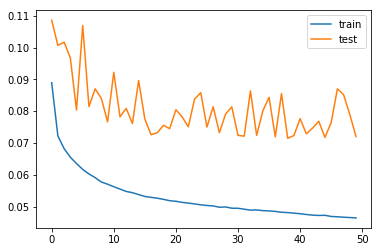

In [685]:
# design network
model = Sequential()
model.add(LSTM(20, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', metrics=['accuracy'],optimizer='rmsprop')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=True)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [686]:
#yhat = model.predict(test_X)

In [687]:
#yhat.shape

(346, 1)

In [688]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

test_y = test_y.reshape((len(test_y), 1))

# calculate RMSE
rmse = sqrt(mean_squared_error(yhat[0:len(yhat)-(prediction_step+1),0],test_y[prediction_step:len(test_y)-1,0]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.193


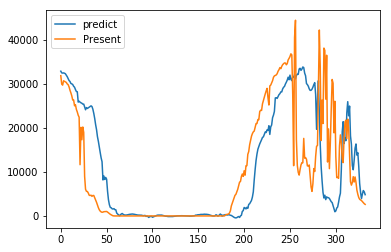

In [689]:
pyplot.plot(yhat[0:len(yhat)-(prediction_step+1),0]*50000, label= 'predict')
pyplot.plot(test_y[prediction_step:len(test_y)-1,0]*50000, label= 'Present')
pyplot.legend()
pyplot.show()


In [690]:
import pandas as pd
df= pd.DataFrame(yhat)
df.to_csv("yhat.csv",index=False)
df= pd.DataFrame(test_y)
df.to_csv("test.csv",index=False)


In [692]:
df= pd.DataFrame(test_X[:,0])
df.to_csv('cloudcover.csv', index=False)

In [693]:
test_X.shape

(346, 80)

In [694]:
len(yhat)

346

In [695]:
len(test_y)

346